# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
path = "Online Retail.xlsx"

In [7]:
df = pd.read_excel(path)

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64


In [12]:
df['Description'] = df['Description'].fillna('No Description')

In [13]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64


In [14]:
df = df.dropna(subset = ["CustomerID"])

In [15]:
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [16]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [17]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [18]:
print('Mean:\n', df.mean(numeric_only=True))

print("Median:\n", df.median(numeric_only=True))

print("Mode:\n", df.mode(numeric_only=True).iloc[0])

Mean:
 Quantity         12.183273
UnitPrice         3.474064
CustomerID    15281.160818
dtype: float64
Median:
 Quantity          5.00
UnitPrice         1.95
CustomerID    15145.00
dtype: float64
Mode:
 Quantity          1.00
UnitPrice         1.25
CustomerID    17841.00
Name: 0, dtype: float64


In [20]:
print("standard deviation:\n", df.std(numeric_only=True))
print("variance:\n", df.var(numeric_only=True))
range_values = df.max(numeric_only=True) - df.min(numeric_only=True)
print("range_values:\n",range_values)

standard deviation:
 Quantity       250.283037
UnitPrice       69.764035
CustomerID    1714.006089
dtype: float64
variance:
 Quantity      6.264160e+04
UnitPrice     4.867021e+03
CustomerID    2.937817e+06
dtype: float64
range_values:
 Quantity      161990.0
UnitPrice      38970.0
CustomerID      5941.0
dtype: float64


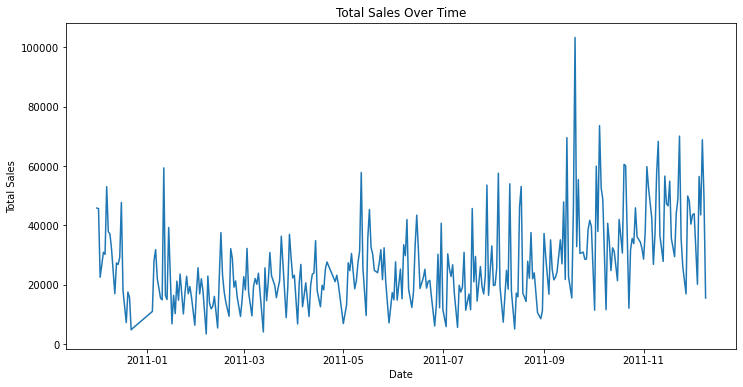

In [21]:
# Ensure 'InvoiceDate' is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Calculate total sales for each invoice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Group by date and sum the total sales
daily_sales = df.groupby(df['InvoiceDate'].dt.date)['TotalPrice'].sum()

# Plot the daily sales
# Make sure matplotlib.pyplot is imported as plt before this cell is run
import matplotlib.pyplot as plt # Ensure this line is present and executed
plt.figure(figsize=(12, 6))
daily_sales.plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

Busiest Months (Total Sales):
Month
11    1126815.070
10     973306.380
9      929356.232
12     893912.290
5      647011.670
8      615078.090
6      606862.520
3      578576.210
7      573112.321
1      473731.900
2      435534.070
4      425222.671
Name: TotalPrice, dtype: float64

Busiest Days of the Week (Total Sales):
DayName
Monday       1271078.601
Tuesday      1562715.681
Wednesday    1526440.000
Thursday     1902316.050
Friday       1238556.741
Saturday             NaN
Sunday        777412.351
Name: TotalPrice, dtype: float64


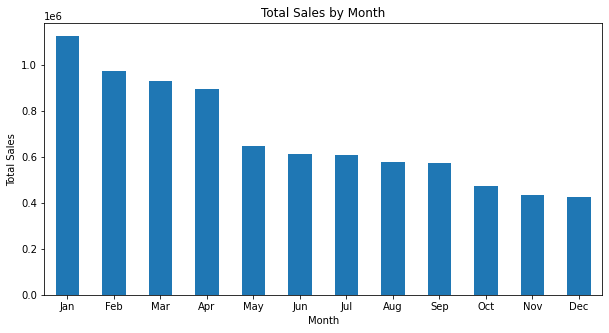

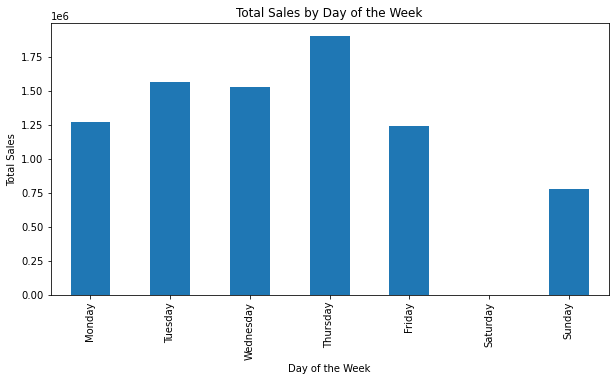

In [22]:
# Extract month and day of the week
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek # Monday=0, Sunday=6

# Calculate total sales by month
monthly_sales = df.groupby('Month')['TotalPrice'].sum().sort_values(ascending=False)

# Calculate total sales by day of the week
# Map dayofweek integer to day name for better readability
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['DayName'] = df['DayOfWeek'].map(day_names)
daily_sales_weekday = df.groupby('DayName')['TotalPrice'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Display the results
print("Busiest Months (Total Sales):")
print(monthly_sales)

print("\nBusiest Days of the Week (Total Sales):")
print(daily_sales_weekday)

# Optional: Plot the results for better visualization
plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='bar')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.show()

plt.figure(figsize=(10, 5))
daily_sales_weekday.plot(kind='bar')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()

In [23]:
# Top-selling products based on quantity
top_products_quantity = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

# Top-selling countries based on quantity
top_countries_quantity = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

# Display the top products (e.g., top 10)
print("Top 10 Selling Products (by Quantity):")
print(top_products_quantity.head(10))

# Display the top countries (e.g., top 10)
print("\nTop 10 Selling Countries (by Quantity):")
print(top_countries_quantity.head(10))

Top 10 Selling Products (by Quantity):
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53119
JUMBO BAG RED RETROSPOT               44963
ASSORTED COLOUR BIRD ORNAMENT         35215
WHITE HANGING HEART T-LIGHT HOLDER    34128
PACK OF 72 RETROSPOT CAKE CASES       33386
POPCORN HOLDER                        30492
RABBIT NIGHT LIGHT                    27045
MINI PAINT SET VINTAGE                25880
PACK OF 12 LONDON TISSUES             25305
PACK OF 60 PINK PAISLEY CAKE CASES    24129
Name: Quantity, dtype: int64

Top 10 Selling Countries (by Quantity):
Country
United Kingdom    3994870
Netherlands        200128
EIRE               136187
Germany            117341
France             109806
Australia           83643
Sweden              35632
Switzerland         29778
Spain               26817
Japan               25218
Name: Quantity, dtype: int64


Outliers in Quantity:
   InvoiceNo StockCode                      Description  Quantity  \
9     536367     84879    ASSORTED COLOUR BIRD ORNAMENT        32   
31    536370     10002      INFLATABLE POLITICAL GLOBE         48   
44    536370     22492          MINI PAINT SET VINTAGE         36   
46    536371     22086  PAPER CHAIN KIT 50'S CHRISTMAS         80   
65    536374     21258       VICTORIAN SEWING BOX LARGE        32   

           InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
9  2010-12-01 08:34:00       1.69     13047.0  United Kingdom       54.08   
31 2010-12-01 08:45:00       0.85     12583.0          France       40.80   
44 2010-12-01 08:45:00       0.65     12583.0          France       23.40   
46 2010-12-01 09:00:00       2.55     13748.0  United Kingdom      204.00   
65 2010-12-01 09:09:00      10.95     15100.0  United Kingdom      350.40   

    Month  DayOfWeek    DayName  
9      12          2  Wednesday  
31     12          2  Wednesday 

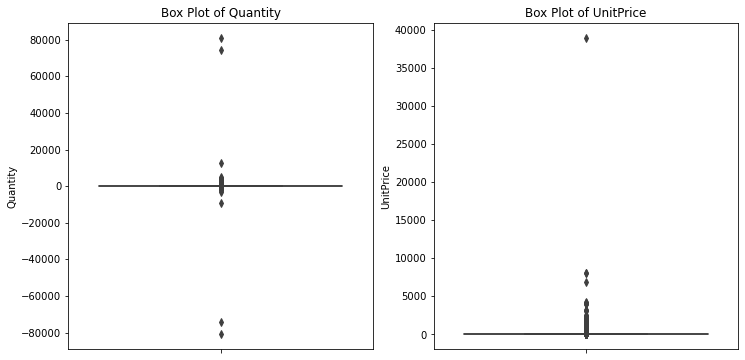

In [24]:
# Calculate Q1, Q3, and IQR for 'Quantity' and 'UnitPrice'
Q1_quantity = df['Quantity'].quantile(0.25)
Q3_quantity = df['Quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity

Q1_unitprice = df['UnitPrice'].quantile(0.25)
Q3_unitprice = df['UnitPrice'].quantile(0.75)
IQR_unitprice = Q3_unitprice - Q1_unitprice

# Define outlier bounds
lower_bound_quantity = Q1_quantity - 1.5 * IQR_quantity
upper_bound_quantity = Q3_quantity + 1.5 * IQR_quantity

lower_bound_unitprice = Q1_unitprice - 1.5 * IQR_unitprice
upper_bound_unitprice = Q3_unitprice + 1.5 * IQR_unitprice

# Identify outliers in 'Quantity' and 'UnitPrice'
outliers_quantity = df[(df['Quantity'] < lower_bound_quantity) | (df['Quantity'] > upper_bound_quantity)]
outliers_unitprice = df[(df['UnitPrice'] < lower_bound_unitprice) | (df['UnitPrice'] > upper_bound_unitprice)]

print("Outliers in Quantity:")
print(outliers_quantity.head())

print("\nOutliers in UnitPrice:")
print(outliers_unitprice.head())

# Visualize outliers using box plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Quantity'])
plt.title('Box Plot of Quantity')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['UnitPrice'])
plt.title('Box Plot of UnitPrice')
plt.show()

# Based on the exploratory data analysis performed, here's a summary of the key findings:

Data Overview: The dataset contains transactional data with columns like InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, and Country.
Missing Values: The analysis revealed missing values in the Description and CustomerID columns.
Missing values in Description were imputed with 'No Description'.
Rows with missing CustomerID were dropped, as this is crucial for customer-based analysis.
Data Duplicates: Duplicate rows were identified and removed, ensuring the analysis is based on unique transactions.
Descriptive Statistics:
The descriptive statistics for numerical columns (Quantity and UnitPrice) showed a wide range of values and indicated the presence of potential outliers, particularly in Quantity.
The mean and median provided insights into the typical transaction values, while the standard deviation and variance highlighted the dispersion of the data.
Sales Trends Over Time:
Analyzing daily sales revealed fluctuations and potential seasonal patterns.
Monthly sales analysis identified the busiest months (likely those with higher sales volume).
Daily sales by weekday showed variations in sales activity throughout the week, indicating busier and slower days.
Top Products and Countries:
Identifying top-selling products by quantity highlighted the most popular items.
Identifying top-selling countries by quantity revealed the main geographical markets.
Outlier Identification:
The IQR method and box plots confirmed the presence of outliers in both Quantity and UnitPrice. These outliers represent transactions with extremely high quantities or unit prices.
Overall Conclusions:

The dataset provides valuable insights into customer purchasing behavior, product popularity, and sales trends across different regions and time periods.
Data cleaning steps, such as handling missing values and duplicates, were essential for ensuring the reliability of the analysis.
Outliers in Quantity and UnitPrice need to be considered when performing further analysis or building models, as they can significantly impact results. Depending on the business question, deciding how to handle these outliers (e.g., remove, transform, or analyze separately) is crucial.
The analysis of sales over time, by month and weekday, can inform business strategies related to inventory management, staffing, and marketing campaigns.
Identifying top products and countries can help in targeting marketing efforts and optimizing product offerings.
This exploratory data analysis provides a solid foundation for deeper investigations, such as customer segmentation, predictive modeling, or market basket analysis.